# APSG tutorial - Part 1

**APSG** defines several new python classes to easily manage, analyze and visualize orientation structural geology data. There are several classes to work with orientation data, namely `Vector3` for vectorial data and `Lineation`, `Foliation` for axial data

## Basic usage

**APSG** module could be imported either into own name space or into active one for easier interactive work.

In [1]:
from apsg import *

## Classes Lineation and Foliation
To work with orientation data in structural geology, **APSG** provide two classes, `Foliation` class to represent planar features and `Lineation` class to represent linear features. Both classes support all `Vector3` methods and operators, but it should be noted, that `dot` and `angle` respect their axial nature, i.e. angle between two lineations cant't be bigger than 90 degrees.

To create instance of `Lineation` or `Foliation`, we can use functions `lin` and `fol`. Arguments have similar syntax to `vec3`.

In [2]:
lin(120, 60), fol(216, 62)

(L:120/60, S:216/62)

### Lineation and Foliation methods

To find angle between two linear or planar features we can use method `angle`

In [3]:
l1 = lin(110, 40)
l2 = lin(160, 30)
l1.angle(l2)

41.59741268003547

In [4]:
p1 = fol(330, 50)
p2 = fol(250, 40)
p1.angle(p2)

54.696399321975335

We can use *cross product* to construct planar feature defined by two linear features

In [5]:
l1.cross(l2)

S:113/40

or to construct linear feature defined by intersection of two planar features

In [6]:
p1.cross(p2)

L:278/36

*Cross product* of planar and linear features could be used to construct plane defined by linear feature and normal of planar feature

In [7]:
l2.cross(p2)

S:96/53

or to find perpendicular linear feature on given plane

In [8]:
p2.cross(l2)

L:276/37

Any planar or linear object could be easily visualized on stereonet. Let start with convinient function `quicknet`, which plot on stereonet all given arguments

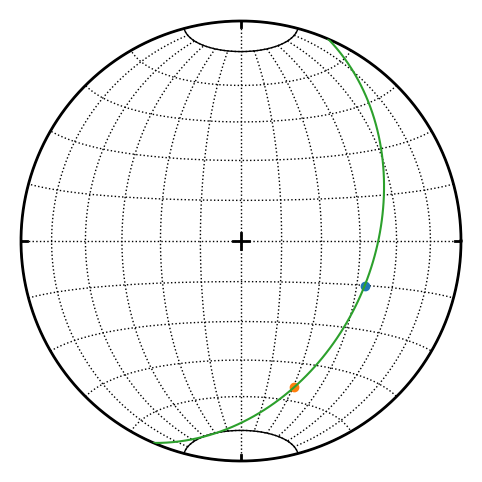

In [9]:
quicknet(l1, l2, l1.cross(l2))

To rotate structural features we can use method ``rotate``

In [10]:
p2.rotate(l2, 45)

S:269/78

## Classes Pair and Fault
To work with paired orientation data like foliations and lineations or fault data in structural geology, **APSG** provide two base `Pair` class and derived `Fault` class. Both classes are instantiated providing dip direction and dip of planar and linear measurements, which are automatically orthogonalized. If misfit is too high, warning is raised. The `Fault` class expects one more argument providing sense of movement information, either 1 or -1 for normal/reverse movement.

To create instance of `Pair`, we have to pass two arguments for planar and two argumets for linear features following geological notation to function `pair`:

In [11]:
p = pair(120, 40, 162, 28)
p

P:118/39-163/30

In [12]:
p.misfit

3.5623168411508175

Planar and linear features are accessible using `fol` and `lin` properties

In [13]:
p.fol, p.lin

(S:118/39, L:163/30)

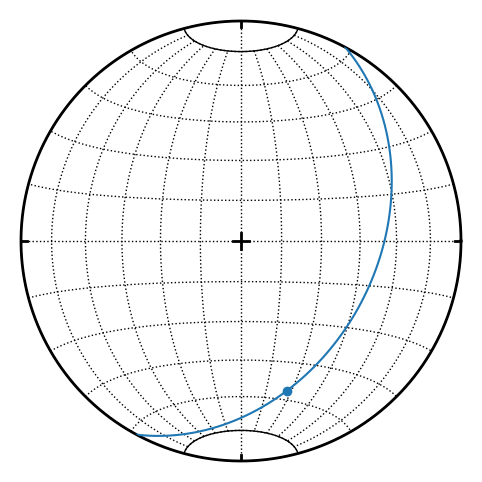

In [14]:
quicknet(p)

To rotate ``Pair`` instance we can use ``rotate`` method

In [15]:
p.rotate(lin(45, 10), 60)

P:314/83-237/61

Instantiation of ``Fault`` class is similar, we just have to provide argument to define sense of movement

In [16]:
f = fault(120, 60, 110, 58, 1)  # 1 for normal fault
f

F:120/59-110/59 +

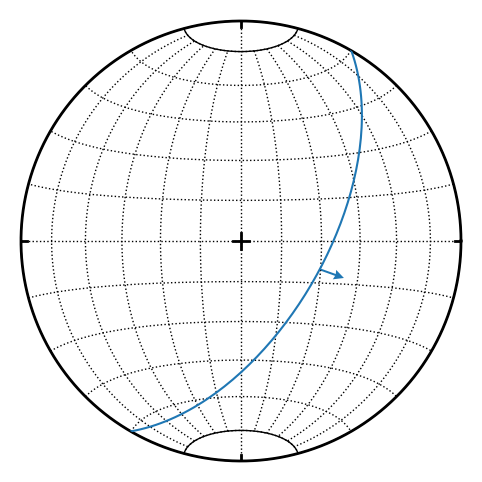

In [17]:
quicknet(f)

Note the change in sense of movement after ``Fault`` rotation

In [18]:
f.rotate(lin(45, 10), 60)

F:312/62-340/59 -

For simple fault analyses ``Fault`` class also provide ``p``, ``t``, ``m`` and ``d`` properties to get PT-axes, kinematic plane and dihedra separation plane

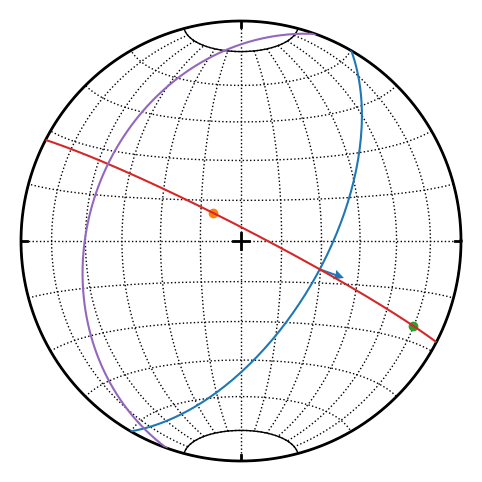

In [19]:
quicknet(f, f.p, f.t, f.m, f.d)

## Feature sets
*APSG* provide several classes to process, analyze and visualize the sets of data. There are e.g. `vecset`, `linset` and `folset` classes to store group of `vec`, `lin` and `fol` objects. All these feature sets are created from homogeneous list of data with optional `name` atribute.

In [20]:
l = linset([lin(120,60), lin(116,50), lin(132,45), lin(90,60), lin(84,52)], name='Lineations')
l

L(5) Lineations

In [21]:
f = folset([fol(120,60), fol(116,50), fol(132,45), fol(90,60), fol(84,52)], name='Foliations')
f

S(5) Foliations

To simplify interactive group creation, you can use function ``G``

In [22]:
g = G([lin(120,60), lin(116,50), lin(132,45), lin(90,60), lin(84,52)], name='L1')
g

L(5) L1

Method ``len`` returns number of features in group

In [23]:
len(g)

5

Most of the `vec`, `lin` and `fol` methods could be used for feature sets as well. For example, to measure angles between all features in group and another feature, we can use method `angle`:

In [24]:
l.angle(lin(110,50))

array([11.49989817,  3.85569115, 15.61367789, 15.11039885, 16.3947936 ])

To rotate all features in group around another feature, we can use method ``rotate``

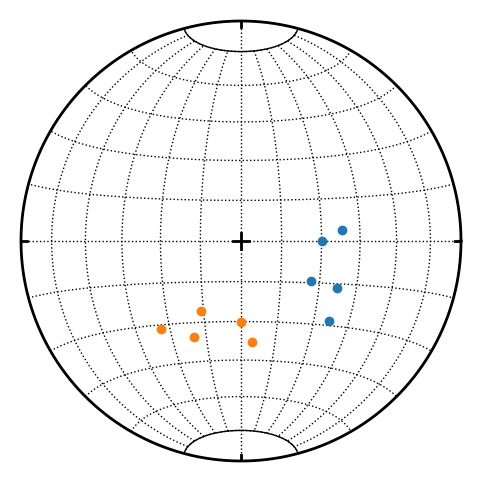

In [25]:
lr = l.rotate(lin(180, 90), 90)
quicknet(l, lr)

Function `R` returns resultant of all features in set. Note that `Lineation` and `Foliation` are axial in nature, so resultant vector is not reliable. Check the orientation tensor anlysis below.

In [26]:
l.R()

L:110/55

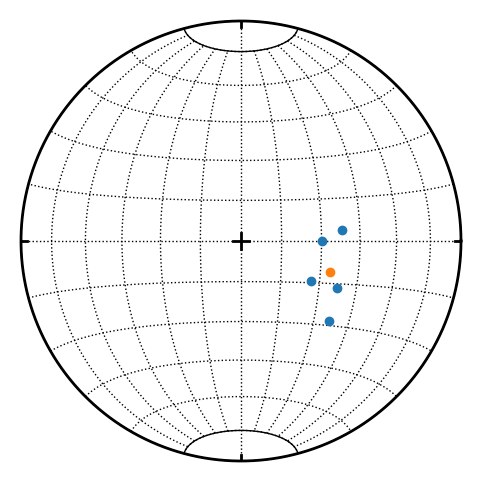

In [27]:
quicknet(l, l.R())

There is several methods to infer spherical statistics as spherical variance, Fisher's statistics, confidence cones on data etc.

In [28]:
l.var()

0.02337168447438498

In [29]:
l.fisher_statistics()

{'k': 34.22945405911087, 'a95': 13.26402990511733, 'csd': 13.844747281750971}

In [30]:
l.fisher_cone_a95()

C:110/55 [13.264]

In [31]:
l.fisher_cone_csd()

C:110/55 [13.8447]

In [32]:
l.delta()

12.411724720740516

In [33]:
l.rdegree()

95.32566310512297

To calculate orientation tensor of all features in group, we can use `ortensor` method.

In [34]:
l.ortensor()

OrientationTensor3
[[ 0.074 -0.096 -0.143]
 [-0.096  0.284  0.421]
 [-0.143  0.421  0.642]]
(S1:0.977, S2:0.201, S3:0.0758)